Вы аналитик российской авиакомпании N, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

# 1. Аналитика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

df1 = pd.read_csv('/datasets/query_1.csv')
df3 = pd.read_csv('/datasets/query_3.csv')
df_last = pd.read_csv('/datasets/query_last.csv')

## Модели самолетов и количество полетов

In [2]:
df1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
df1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
df1 = df1.set_index(['model']) 

## Города и среднее количество полетов

In [6]:
df3.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [7]:
df3.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Пропусков нет, типы данных правильные. Предобработка не нужна 
<hr>
Построим графики

###  Графики для моделей самолетов

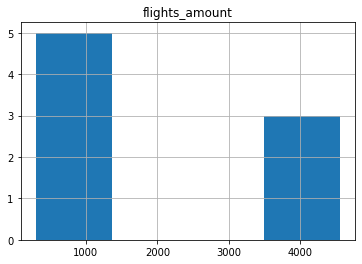

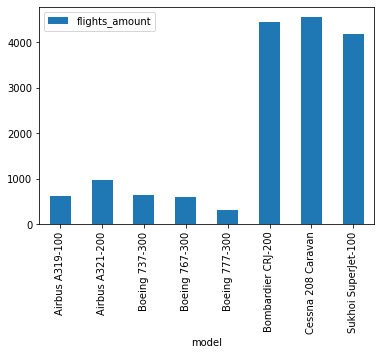

In [9]:
df1.hist(bins=4)
df1.plot(kind='bar')

Соберем Airbus и Boeing: по отдельности и оба вместе

In [10]:
df1.loc['Airbus'] = df1.loc['Airbus A319-100', 'flights_amount'] + \
                df1.loc['Airbus A321-200', 'flights_amount']
df1.loc['Boeing'] = df1.loc['Boeing 737-300', 'flights_amount'] + \
                df1.loc['Boeing 767-300', 'flights_amount'] + \
                df1.loc['Boeing 777-300', 'flights_amount']
df1.loc['A_B'] = df1.loc['Airbus A319-100', 'flights_amount'] + \
                df1.loc['Airbus A321-200', 'flights_amount'] + \
                df1.loc['Boeing 737-300', 'flights_amount'] + \
                df1.loc['Boeing 767-300', 'flights_amount'] + \
                df1.loc['Boeing 777-300', 'flights_amount']
df1

,flights_amount
model,
Airbus A319-100,607
Airbus A321-200,960
Boeing 737-300,630
Boeing 767-300,600
Boeing 777-300,300
Bombardier CRJ-200,4446
Cessna 208 Caravan,4557
Sukhoi SuperJet-100,4185
Airbus,1567


In [11]:
a_b_split = df1.loc[['Airbus', 'Boeing', 'Bombardier CRJ-200', 'Cessna 208 Caravan', 'Sukhoi SuperJet-100']]
a_b_merged = df1.loc[['A_B', 'Bombardier CRJ-200', 'Cessna 208 Caravan', 'Sukhoi SuperJet-100']]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'pie')

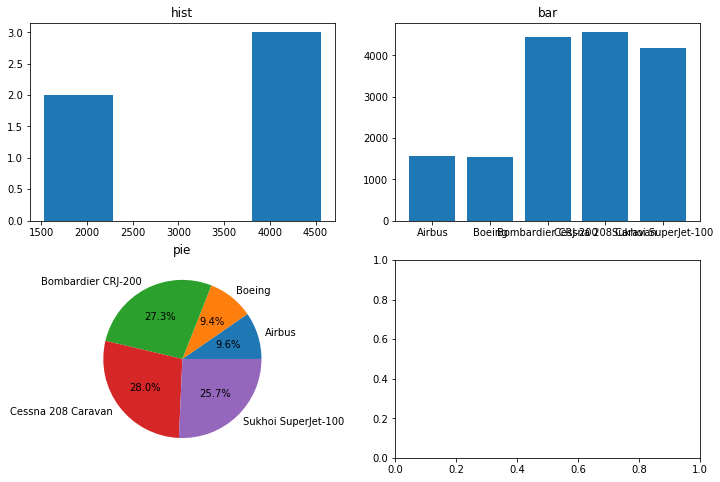

In [12]:
f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(12,8))
ax1.hist(a_b_split['flights_amount'], bins=4)
ax2.bar(a_b_split.index, a_b_split['flights_amount'])
ax3.pie(a_b_split, labels=a_b_split.index, autopct='%1.1f%%')
ax1.set_title('hist')
ax2.set_title('bar')
ax3.set_title('pie')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'pie')

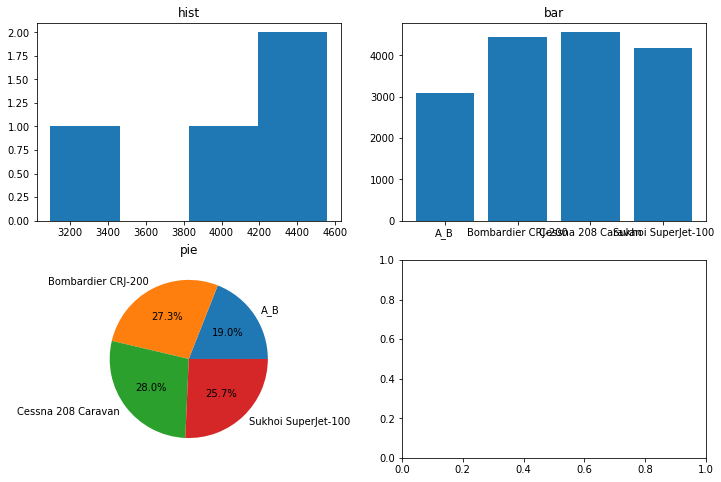

In [13]:
f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(12,8))
ax1.hist(a_b_merged['flights_amount'], bins=4)
ax2.bar(a_b_merged.index, a_b_merged['flights_amount'])
ax3.pie(a_b_merged, labels=a_b_merged.index, autopct='%1.1f%%')
ax1.set_title('hist')
ax2.set_title('bar')
ax3.set_title('pie')

В целом можно рассматривать 5 групп самолетов (4 - если объединить Airbus и Boeing) и меньше всего сделали вылетов Airbus и Boeing



<hr>

### Графики для городов

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa10a3f57d0>]],
      dtype=object)

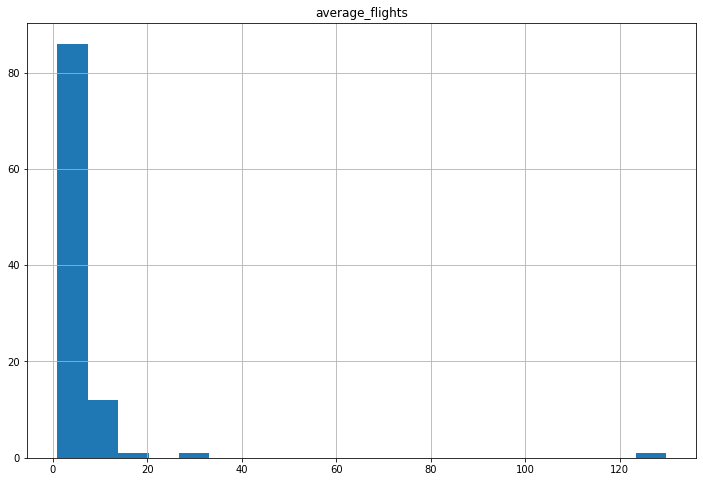

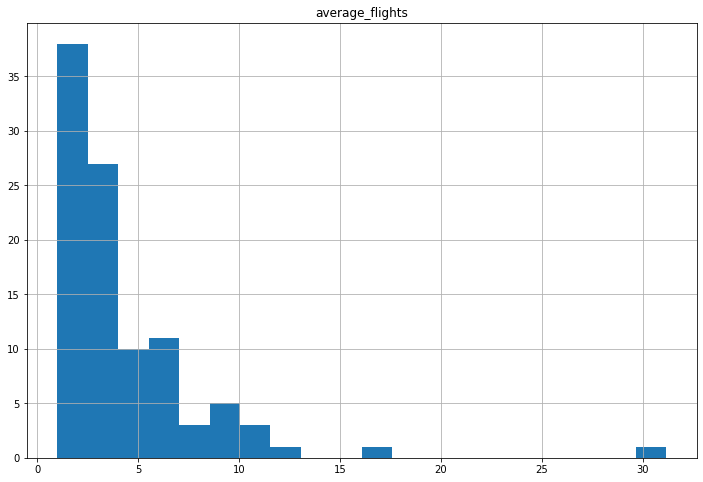

In [14]:
df3.hist(bins=20, figsize=(12,8))
df3[df3['average_flights'] < 40].hist(bins=20, figsize=(12,8))

В большинстве городов средее количество полетов в совершенно по несколько раз, не более 4

<hr>

Посмотрим на топ-10

In [15]:
city_top10 = df3.sort_values(by='average_flights', ascending=False)[:10]
city_top10 = city_top10.set_index(['city']) 
city_top10

,average_flights
city,
Москва,129.774194
Санкт-Петербург,31.161290
Новосибирск,17.322581
Красноярск,11.580645
Екатеринбург,11.322581
Ростов-на-Дону,10.193548
Пермь,10.129032
Брянск,10.000000
Сочи,9.612903


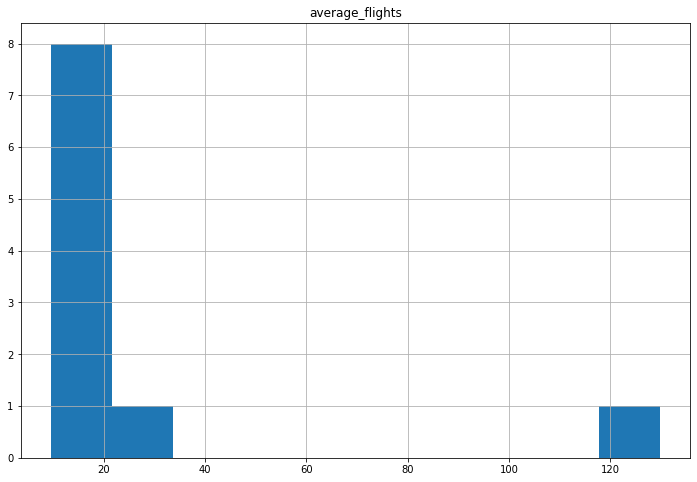

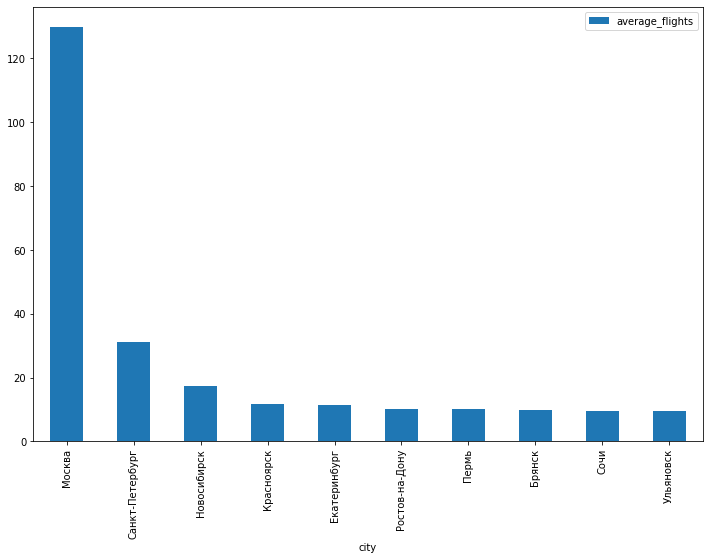

In [16]:
city_top10.hist(bins=10, figsize=(12,8))
city_top10.plot(kind='bar', figsize=(12,8))

Большое количество полетов в Москве, очеивдно, объясняется тем, что это столица. То же самое можно сказать и про Санкт-Петербург, хотя по сравнению с Москвой полетов меньше.

## Таблица с данными о фестивалях в Москве

In [17]:
df_last

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [18]:
df_last.describe()

,week_number,ticket_amount,festival_week
count,10.00000,10.000000,3.000000
mean,34.50000,50670.400000,32.333333
std,3.02765,2502.752716,3.214550
min,30.00000,43568.000000,30.000000
25%,32.25000,51364.500000,30.500000
50%,34.50000,51439.000000,31.000000
75%,36.75000,51596.750000,33.500000
max,39.00000,51675.000000,36.000000


In [19]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


- **festival_week** совпадает с **week_number** и имеет пропуски, его можно удалить. 
- **festival_name** имеет пропуски, но он понадобится чтобы задать булево свойство - наличие фестиваля

In [20]:
df_last = df_last.drop('festival_week', axis=1)
df_last.head()

,week_number,ticket_amount,festival_name
0,30,43568,Park Live
1,31,51034,Пикник Афиши
2,32,51675,NaN
3,33,51378,NaN
4,34,51492,NaN


In [21]:
df_last['is_festival'] = np.where(df_last['festival_name'].isnull(), 0, 1)
df_last

,week_number,ticket_amount,festival_name,is_festival
0,30,43568,Park Live,1
1,31,51034,Пикник Афиши,1
2,32,51675,NaN,0
3,33,51378,NaN,0
4,34,51492,NaN,0
5,35,51360,NaN,0
6,36,51386,Видфест,1
7,37,51670,NaN,0
8,38,51518,NaN,0
9,39,51623,NaN,0


# 2. Проверка гипотезы

Примем за нулевую гипотезу H<sub>0</sub> - средние значения спроса на билеты равный, а альтернативная H<sub>1</sub> - не равны. <br>
Проверку гипотезы сделаем t-критерием Стьюдента. Сначала убедимся, что наши данные распределены нормально: для этого используем тест Шапиро-Уилка<br>
Пороговое значение alpha примем 5%

Создадим выборки: количество билетов во время фестиваля и в другое время

In [22]:
fest_time = df_last[df_last['is_festival']==1]['ticket_amount']
other_time = df_last[df_last['is_festival']==0]['ticket_amount']

Проверим на нормальность обе выборки. Функция будет возвращать 2 значения: критерий Шапиро-Уилка и  p-value, т.е. функция проверяет гипотезу, что выборка нормальная

Тест Шапиро-Уилка: (0.7836964726448059, 0.07614270597696304)
Принимаем гипотезу, что распределение нормальное


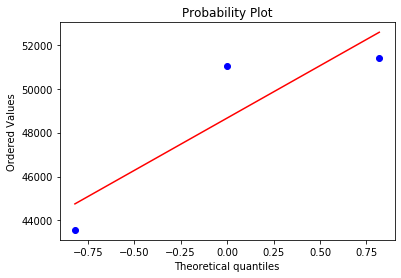

In [23]:
#график нормального распределения, сравнивающий распределение данных в fest_time к нормальному распределению.
st.probplot(fest_time, dist="norm", plot=plt) 
f_w, f_p = st.shapiro(fest_time)
print("Тест Шапиро-Уилка:", st.shapiro(fest_time))
if f_p < 0.05:
    print('Отвергаем гипотезу, что распределение нормальное')
else:
    print('Принимаем гипотезу, что распределение нормальное')

plt.show()

Тест Шапиро-Уилка: (0.8940209150314331, 0.29630061984062195)
Принимаем гипотезу, что распределение нормальное


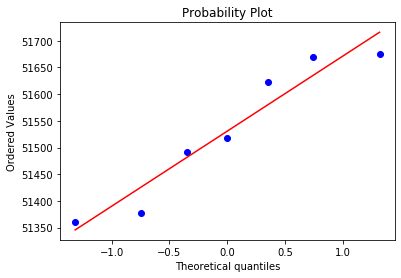

In [24]:
st.probplot(other_time, dist="norm", plot=plt)
f_w, f_p = st.shapiro(other_time)
print("Тест Шапиро-Уилка:", st.shapiro(other_time))
if f_p < 0.05:
    print('Отвергаем гипотезу, что распределение нормальное')
else:
    print('Принимаем гипотезу, что распределение нормальное')

plt.show()

Наши выборки можно считать нормально распределенными
<hr>
Взглянем на числовые данные и гистограммы

In [25]:
print('fest_time')
print(fest_time.describe())
print()
print('other_time')
print(other_time.describe())

fest_time
count        3.000000
mean     48662.666667
std       4415.619700
min      43568.000000
25%      47301.000000
50%      51034.000000
75%      51210.000000
max      51386.000000
Name: ticket_amount, dtype: float64

other_time
count        7.000000
mean     51530.857143
std        130.933098
min      51360.000000
25%      51435.000000
50%      51518.000000
75%      51646.500000
max      51675.000000
Name: ticket_amount, dtype: float64


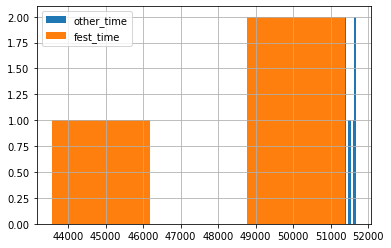

In [26]:
other_time.hist(bins=7)
fest_time.hist(bins=3)
plt.legend(['other_time', 'fest_time'])

По таким графикам кажется, что данные не пересекаются. Построим доверительные интервалы для наших выборок. Для использования стандартного boxplot у нас слишком мало значений. Поэтому отрисуем интервалы сами c помощью t-распределения Стьюдента. <br>
Используется следующая формула,
$$ Xm \pm k*\frac{std}{\sqrt{n}}$$
где **Xm** - среднее значение выборки, **k** - коэфициент взятый из таблицы ниже, который зависит от степени свободы, которая равна n-1, **n** - колиечство элементов в выборке, **std** - стандартное отклонение

https://www.medcalc.org/manual/t-distribution.php
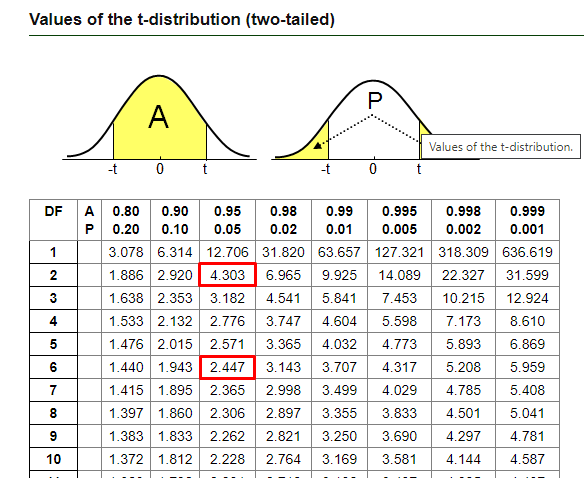

In [27]:
x_coordinates = [0, 3] # возьмем всего пару координат, просто чтобы построить горизонтальные линии

Найдем интервалы и средния значения выборок и построим график

In [28]:
def get_interval(seq, koef):
    """
    считаем доверительные интервалы в 95%
    koef - для n = 3, равен 4.303
    koef - для n = 7, равен 2.447
    """
    seq_m = np.mean(seq) # Xm
    seq_std = np.var(seq)**(1/2) # std
    seq_n = seq.shape[0] # n
    seq_edge = koef * (seq_std/seq_n**(1/2)) # величина отступа от среднего
    return  [seq_m - seq_edge, seq_m + seq_edge]

fest_interval = get_interval(fest_time, 4.303)
fest_mean = np.mean(fest_time) 

other_interval = get_interval(other_time, 2.447)
other_mean = np.mean(other_time)

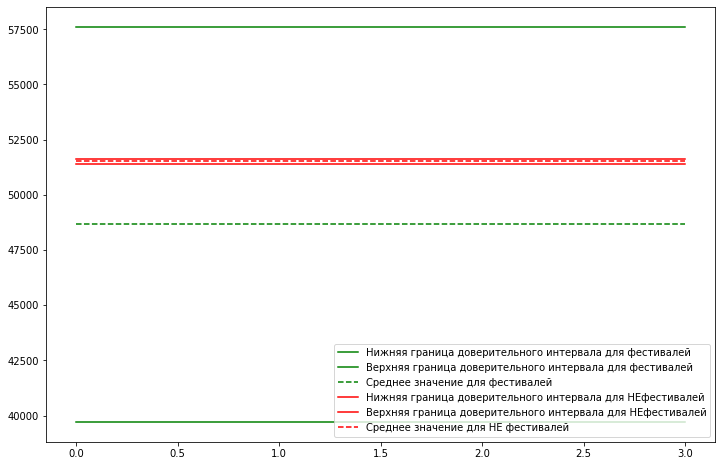

In [29]:
plt.figure(figsize=(12,8))
plt.plot(
    x_coordinates, [fest_interval[0], fest_interval[0]], 'g-', 
    x_coordinates, [fest_interval[1], fest_interval[1]], 'g-', 
    x_coordinates, [fest_mean, fest_mean], 'g--'
)
plt.plot(
    x_coordinates, [other_interval[0], other_interval[0]], 'r-', 
    x_coordinates, [other_interval[1], other_interval[1]], 'r-',
    x_coordinates, [other_mean, other_mean], 'r--'
)
plt.legend([
    'Нижняя граница доверительного интервала для фестивалей', 
    'Верхняя граница доверительного интервала для фестивалей', 
    'Среднее значение для фестивалей',
    'Нижняя граница доверительного интервала для НЕфестивалей' , 
    'Верхняя граница доверительного интервала для НЕфестивалей',
    'Среднее значение для НЕ фестивалей', 
], loc=4)

По графикам уже можно сделать вывод, что доверительные интервалы в 95% пересекаются, точнее среднее НЕфестивалей входит в выборку фестивалей. В общем, мы уже можем принять нулевую гипотезу. 
<hr>
Теперь найдем численное значение, для начала узнаем, совпадают ли у нас дисперсии выборок

In [30]:
print('Дисперсия fest_time:', np.var(fest_time))
print()
print('Дисперсия other_time:', np.var(other_time))

Дисперсия fest_time: 12998464.888888888

Дисперсия other_time: 14694.408163265309


In [31]:
alpha = .05 
results = st.ttest_ind(
    other_time,
    fest_time, 
    equal_var=False # Так как дисперсии отличаются
)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.377432493172683
Не получилось отвергнуть нулевую гипотезу


# Вывод

По моделям самолетов, можно сказать, что в основном используются 5 групп и  Airbus c Boeing используются реже остальных <br>
По городам: чаще всего летают в Москву, меньше Санкт-Петербург. В большинстве городов в среднем в сутки происходит всего несколько вылетов <br>
По разнице средних прилетов в Москву вне и во время фестивалей: можно сказать, что разницы нет. 